# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [69]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [70]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.info()
transactions.describe()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [71]:
# TODO: view the shape of your data
transactions.shape
print(f"The dataset contains {transactions.shape[0]:,} rows and {transactions.shape[1]} columns.")


The dataset contains 1,000,000 rows and 10 columns.


In [72]:
# Check how many null values are in each column
transactions.isnull().sum()


type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [73]:
# Total number of null values
transactions.isnull().sum().sum()

np.int64(0)

In [74]:
transactions_clean = transactions.dropna()
transactions_clean.isnull().sum().sum()

np.int64(0)

## EDA & Reflection Questions

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

## Q1: Distribution of Numeric Features

Here I want to understand how transaction amounts and account balances are distributed. This helps identify common behaviors versus rare, potentially suspicious transactions.


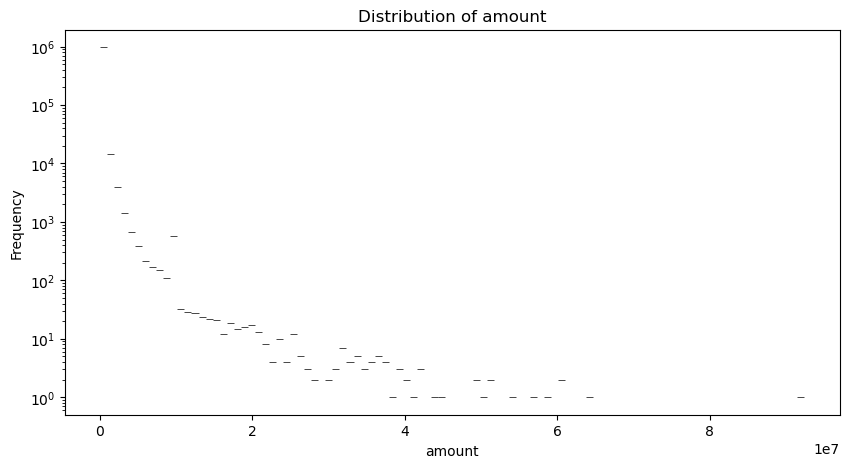

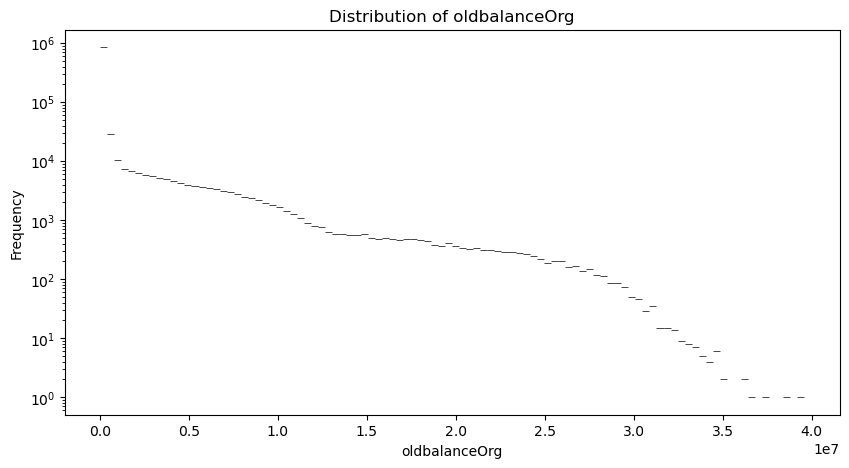

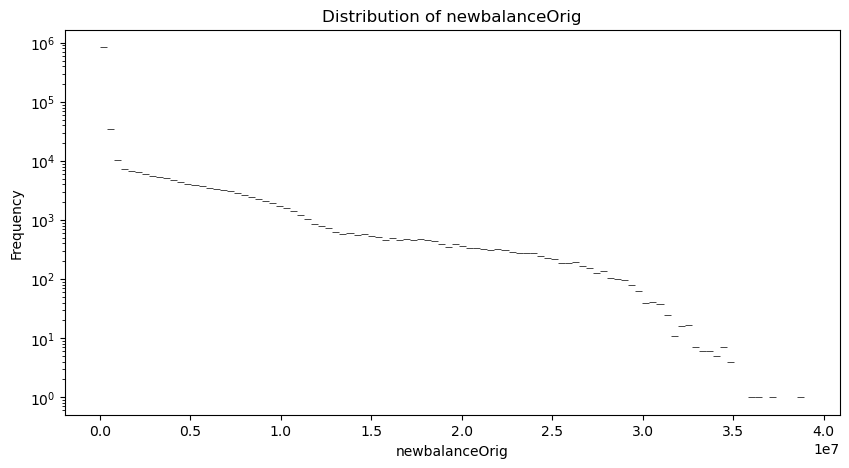

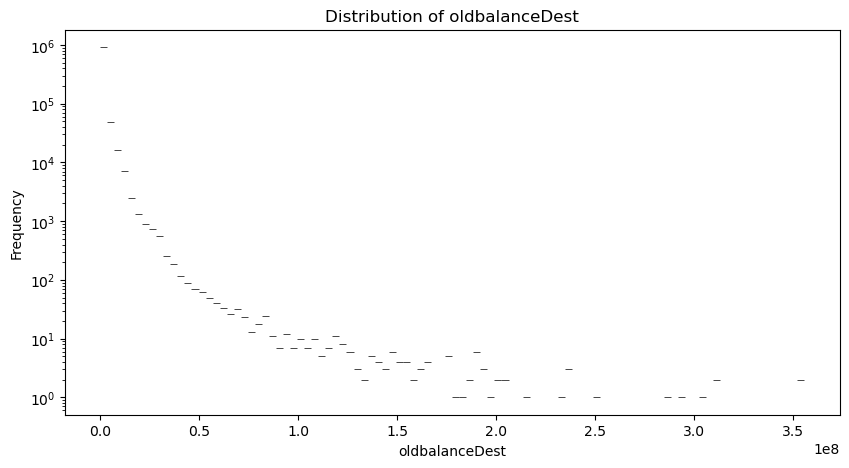

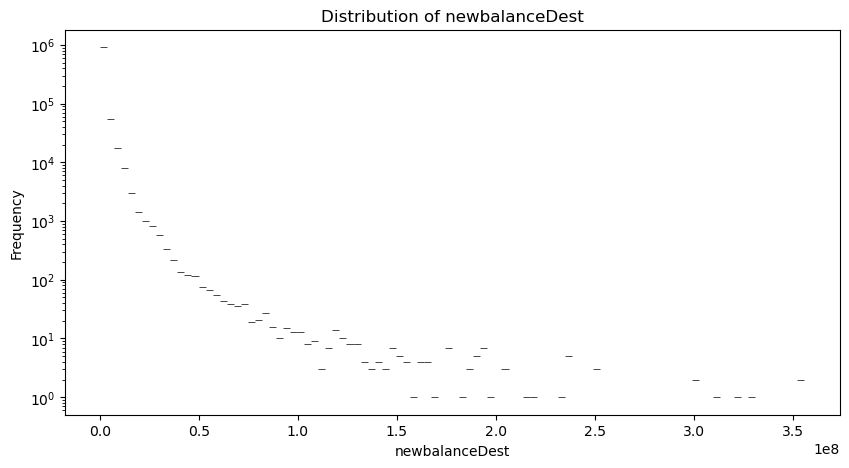

In [75]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(transactions[col], bins=100, log_scale=(False, True))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [76]:
summary_table = transactions[numeric_cols].describe().T

In [77]:
# Add interquartile range and skew for deeper insights
summary_table['IQR'] = summary_table['75%'] - summary_table['25%']
summary_table['Skew'] = transactions[numeric_cols].skew()

# Round for presentation
summary_table = summary_table.round(2)
summary_table

,count,mean,std,min,25%,50%,75%,max,IQR,Skew
amount,1000000.0,179620.78,607618.14,0.0,13369.39,74435.00,208340.44,9.244552e+07,194971.05,33.30
oldbalanceOrg,1000000.0,835118.38,2892918.23,0.0,0.00,14110.00,107380.37,3.958504e+07,107380.37,5.25
newbalanceOrig,1000000.0,856510.42,2928896.36,0.0,0.00,0.00,144656.64,3.893942e+07,144656.64,5.18
oldbalanceDest,1000000.0,1102855.75,3464914.58,0.0,0.00,133184.94,943020.88,3.555534e+08,943020.88,21.57
newbalanceDest,1000000.0,1227858.95,3752687.91,0.0,0.00,214865.18,1110701.57,3.560159e+08,1110701.57,20.80


### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here: The numeric features numeric features in the dataset, including amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDes, reveals significant right-skewness and imbalance in transaction behavior. This means most transaction amounts are small, while a few transactions involve high amounts. 
The amount column has a mean of ~179,620 and a maximum value over 92 million, with a very high skew of 33.30. The interquartile range (IQR) is ~195,000, showing that while most transactions are relatively modest, a few extreme values drive the average up significantly. Both oldbalanceOrg and newbalanceOrig are also right-skewed (skew > 5), with medians of 14,110 and 0. This suggests many users initiate transactions from accounts with little to no balance, while a few accounts hold very large amounts. Both oldbalanceDest and newbalanceDest balances show extremely high max values (over 350 million) and skewness above 20, indicating a very small number of high-value recipients. The IQR values are also large, confirming a wide spread in destination balances. Based on these factors it's safe to conclude that the majority of transactions are low to mid-range, representing regular behavior, while a small number of rare, high-value transactions stand out and may warrant further investigation — particularly in the context of fraud detection.

## Q2: Numeric Features vs Fraud Status

Here I compare pairs of numeric features to spot unusual patterns or clusters that might help identify fraudulent transactions.


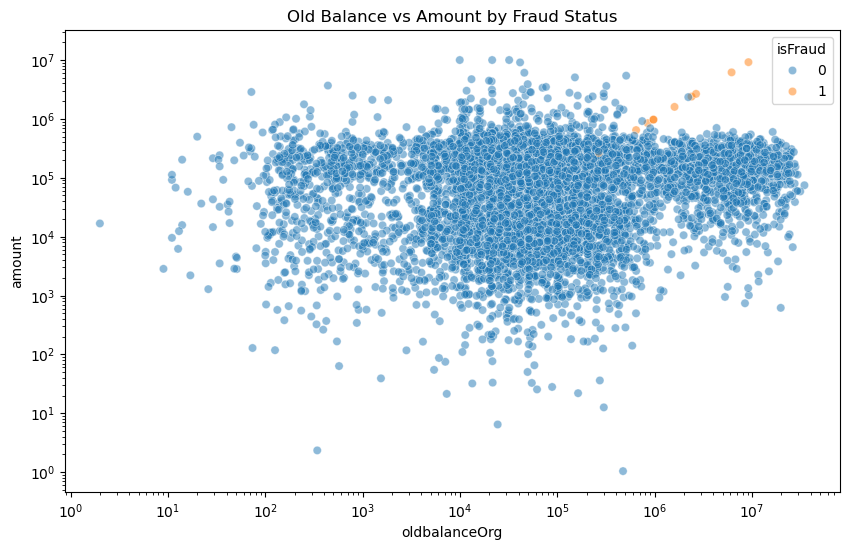

In [78]:
# Example: amount vs oldbalanceOrg, colored by fraud
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions.sample(10000), x='oldbalanceOrg', y='amount', hue='isFraud', alpha=0.5)
plt.title('Old Balance vs Amount by Fraud Status')
plt.xscale('log')
plt.yscale('log')
plt.show()

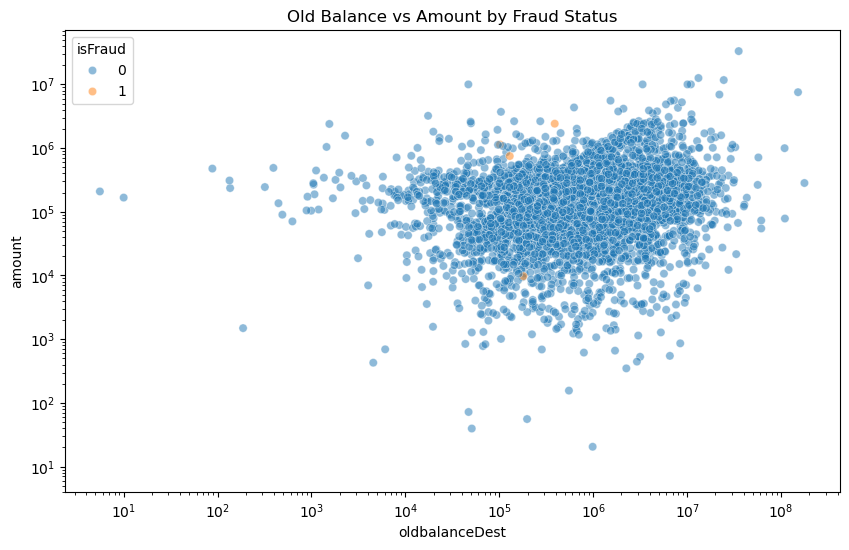

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions.sample(10000), x='oldbalanceDest', y='amount', hue='isFraud', alpha=0.5)
plt.title('Old Balance vs Amount by Fraud Status')
plt.xscale('log')
plt.yscale('log')
plt.show()

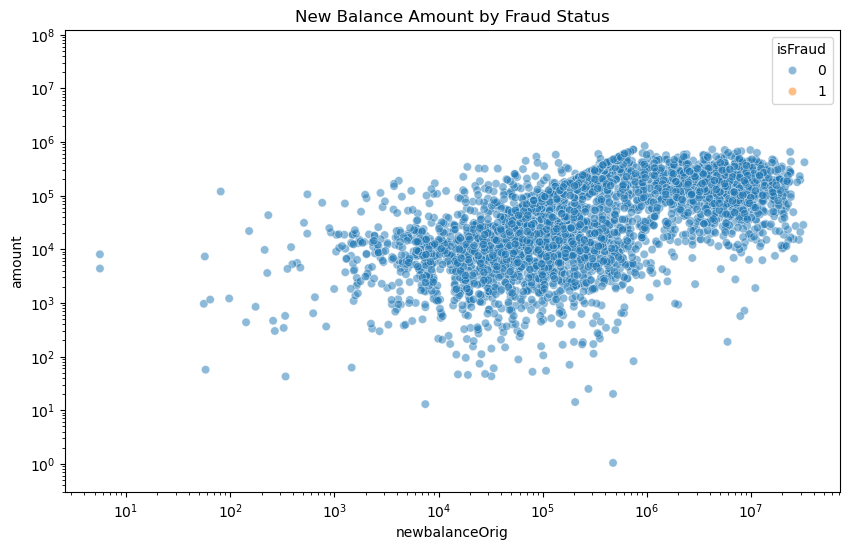

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions.sample(10000), x='newbalanceOrig', y='amount', hue='isFraud', alpha=0.5)
plt.title('New Balance Amount by Fraud Status')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here: When plotting oldbalanceOrg against amount specifically and distinguishing transactions by fraud status, several patterns are revealed including:
Fraudulent transactions (orange dots) are sparse and appear clustered in specific regions, rather than spread throughout the entire range. Many fraud cases seem to occur where the transaction amount is close to or nearly equals the oldbalanceOrg, suggesting a pattern of draining accounts. These fraud points are more concentrated in the mid-to-high value ranges (e.g., between 10⁴ and 10⁶) on both axes, whereas the majority of non-fraudulent transactions (blue) are widely scattered and denser in volume. There's a noticeable absence of fraudulent transactions in the low-value transaction range, which supports the idea that fraud tends to occur during larger transactions. This visual evidence supports the conclusion that fraudulent transactions are not randomly distributed, and is consistent across different numerical factors. Instead, they concentrate in specific monetary ranges, especially where high balances are paired with large withdrawal amounts — a behavior not typical of most normal (non-fraudulent) users.

## Q3: Transaction Type vs Amount

Here I wanted to analyze how transaction amounts vary based on transaction type. I used boxplots and summary stats to determine if certain transaction types consistently involve higher amounts.


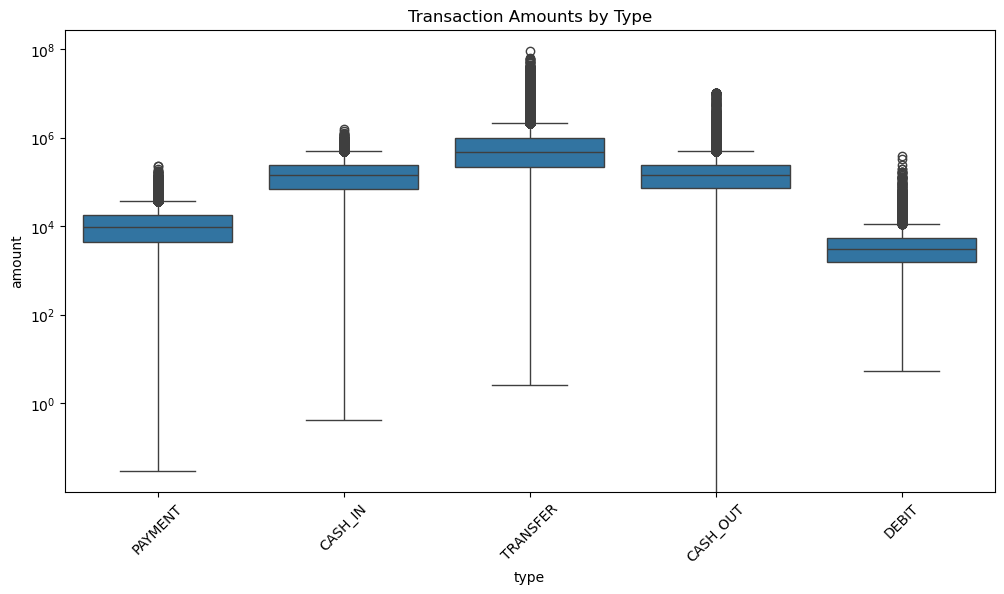

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,219955.0,168928.914668,1.267864e+05,0.43,70092.845,142942.990,240085.0800,1609288.13
CASH_OUT,351360.0,175584.659320,1.703743e+05,0.00,72382.815,146209.915,245881.7625,10000000.00
DEBIT,6417.0,5445.890813,1.302416e+04,5.24,1530.240,3099.530,5423.2500,389762.68
PAYMENT,338573.0,13055.592085,1.256291e+04,0.03,4377.100,9481.670,17565.5600,230549.18
TRANSFER,83695.0,911827.155179,1.896175e+06,2.60,217105.800,487883.710,978027.6650,92445516.64


In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=transactions, x='type', y='amount')
plt.title('Transaction Amounts by Type')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

transactions.groupby('type')['amount'].describe()

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

Answer here: When breaking the dataset down by transaction type, vast differences are evident in the typical amounts associated with each type:

TRANSFER transactions consistently involve the largest amounts, with a high median and a wide interquartile range (IQR). The presence of extreme outliers suggests that this type is frequently used for large-value transfers — often a red flag in fraud detection.

CASH_OUT transactions also involve relatively high amounts, with a distribution similar to TRANSFER but slightly lower. This pattern aligns with common fraud strategies that involve draining accounts.

CASH_IN transactions fall in the moderate range, with amounts generally higher than PAYMENTs but lower than TRANSFERs. The range is still broad, with a few very large values suggesting irregular cash deposits.

PAYMENT and DEBIT transactions involve the smallest amounts overall, with tightly clustered medians and smaller IQRs. This reflects routine spending or debiting behavior and likely represents legitimate user activity.

In summary, the visual makes it clear that TRANSFER and CASH_OUT types are associated with significantly larger amounts, which could indicate higher risk for potential fraud. On the other hand, PAYMENT and DEBIT types are more conservative in amount and likely routine in nature, less likely to have fraudulent transactions.

## Q4: Average Transaction Amount by Type and Fraud Status

This part of the EDA focuses on how fraudulent vs non-fraudulent transactions vary in size for each transaction type.


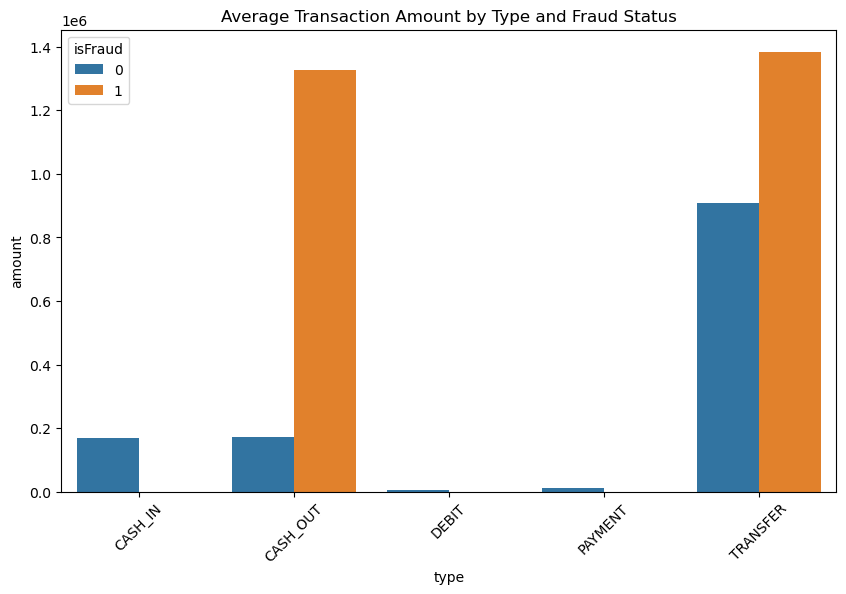

In [82]:
# Average amount by type and fraud status
fraud_amounts = transactions.groupby(['type', 'isFraud'])['amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_amounts, x='type', y='amount', hue='isFraud')
plt.title('Average Transaction Amount by Type and Fraud Status')
plt.xticks(rotation=45)
plt.show()


### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here: Yes, transaction amounts vary significantly when comparing fraudulent vs. non-fraudulent transactions across different types. The bar chart reveals some striking patterns:

TRANSFER and CASH_OUT are the only transaction types associated with fraudulent activity (isFraud = 1), and the average transaction amount for frauds is drastically higher than for non-fraudulent transactions in both cases.

Fraudulent TRANSFER transactions average ~1.39 million, much higher than the non-fraudulent average of ~0.9 million.

Fraudulent CASH_OUT transactions also average over 1.3 million, compared to just ~175,000 for legitimate ones.

CASH_IN, PAYMENT, DEBIT transactions show no fraud cases, meaning fraud is highly concentrated in specific types of transactions.

This pattern highlights that fraudsters are not only targeting specific transaction types, but also executing them with significantly larger amounts. The high average value in fraudulent TRANSFER and CASH_OUT transactions suggests an attempt to maximize gain in a single transaction — possibly to avoid detection over time.

Overall, this visual confirms that fraudulent activity is both selective and high-stakes, concentrated in specific transaction types involving large sums of money.

## Q5: Fraud Flag vs Actual Fraud

Here I planned to evaluate how often the system’s `isFlaggedFraud` correctly identifies actual fraud, and how often it misses or wrongly flags transactions.


In [83]:
# Crosstab to compare isFraud vs isFlaggedFraud
fraud_flag_matrix = pd.crosstab(transactions['isFraud'], transactions['isFlaggedFraud'], rownames=['Actual Fraud'], colnames=['Flagged by System'])
print(fraud_flag_matrix)


Flagged by System       0  1
Actual Fraud                
0                  998703  0
1                    1296  1


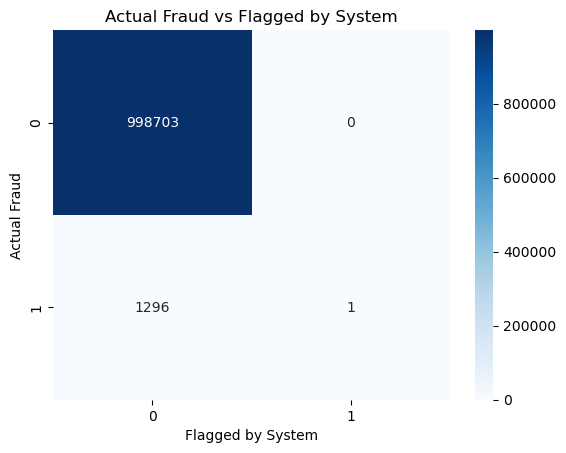

In [84]:
sns.heatmap(fraud_flag_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Actual Fraud vs Flagged by System')
plt.show()

### Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here: The system’s current fraud flag (isFlaggedFraud) is highly ineffective at identifying actual fraudulent transactions. Out of 1,297 true fraud cases, only one was correctly flagged, while the remaining 1,296 frauds went completely undetected. Interestingly, the system never flags any non-fraudulent transactions, resulting in a false positive rate of zero. However, this isn't a sign of accuracy—it likely reflects an overly conservative approach that prioritizes avoiding false alarms at the expense of missing real threats. As a result, the system suffers from an extremely high false negative rate and a recall close to zero, meaning it fails to detect the vast majority of fraud. Although it may seem beneficial to avoid false flags, the system's inability to identify actual fraud makes it unreliable for prevention or early detection. These findings suggest that the isFlaggedFraud feature offers little practical value and should be replaced or enhanced with a more effective, data-driven model.